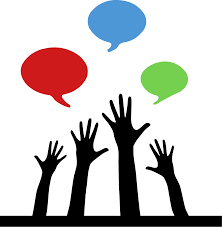

# Author: Lokesh Sharma
The Spark Foundation - Data Science and Business Analytics Internship <br>
(GRIP JANUARY'23)

# Task 2: Exploratory Data Analysis - Sports
Problem Statement <br>
1. Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’<br>
2. As a sports analysts, find out the most successful teams, players and factors 
contributing win or loss of a team. <br>
3. Suggest teams or players a company should endorse for its products. 

In [51]:
# Importing libraries in Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df1 = pd.read_csv('deliveries.csv')
df2 = pd.read_csv('matches.csv')

In [3]:
print(df1.shape)
print(df2.shape)

(179078, 21)
(756, 18)


In [4]:
df1.head(12)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [54]:
df1['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [5]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
# Groupiing the 1st innings, 2nd innings score in a particular matchid
# Lets say match id = 1, So inning 1 score = 207, inning 2 score = 172

totalrun_df = df1.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
totalrun_df.head(10)

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
5,3,2,184
6,4,1,163
7,4,2,164
8,5,1,157
9,5,2,142


In [7]:
# Capturing only the first innings score, as we will predicting for the second innings

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)
totalrun_df

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [8]:
df2['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
df2['winner'].nunique()

15

In [10]:
df2['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Most of the match won by Mumbai Indians

In [11]:
df2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [12]:
df2['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [13]:
df2['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [14]:
df2[df2['winner']=='Mumbai Indians']['toss_decision'].value_counts()

field    64
bat      45
Name: toss_decision, dtype: int64

In [15]:
df2['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [16]:
df2[(df2['city']=='Mumbai') & (df2['winner']=='Mumbai Indians')]['winner'].count()

53

In [17]:
df2['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [18]:
print("Unique values: ", df2['dl_applied'].unique())
print(df2[df2['dl_applied']==1].count())

Unique values:  [0 1]
id                 19
season             19
city               19
date               19
team1              19
team2              19
toss_winner        19
toss_decision      19
result             19
dl_applied         19
winner             19
win_by_runs        19
win_by_wickets     19
player_of_match    19
venue              19
umpire1            19
umpire2            19
umpire3             3
dtype: int64


In [19]:
df2[df2['dl_applied']==1]['winner'].unique()

array(['Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings',
       'Delhi Daredevils', 'Kochi Tuskers Kerala',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Rajasthan Royals'], dtype=object)

In [20]:
df2['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [21]:
df2['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [22]:
df2[df2['venue']=='Eden Gardens']['winner'].value_counts()

Kolkata Knight Riders          45
Mumbai Indians                 10
Chennai Super Kings             5
Royal Challengers Bangalore     4
Kings XI Punjab                 3
Gujarat Lions                   2
Rajasthan Royals                2
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Kochi Tuskers Kerala            1
Delhi Daredevils                1
Delhi Capitals                  1
Name: winner, dtype: int64

In [23]:
df2['venue'].nunique()

41

In [24]:
df2[df2['venue']=='M Chinnaswamy Stadium']['winner'].value_counts()

Royal Challengers Bangalore    34
Mumbai Indians                  8
Kolkata Knight Riders           7
Kings XI Punjab                 5
Chennai Super Kings             5
Rajasthan Royals                4
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

In [25]:
winners_at_home = {}
maximum = []
stadiums = df2['venue'].unique()
for i,std in enumerate(stadiums):
    maximum.append(df2[df2['venue']==std]['winner'].value_counts().max())
    winners_at_home[std] = df2[df2['venue']==std]['winner'].value_counts()==maximum[i]

#     print(maximum)


In [55]:
winners_at_home

{'Rajiv Gandhi International Stadium, Uppal': Sunrisers Hyderabad             True
 Mumbai Indians                 False
 Kolkata Knight Riders          False
 Delhi Daredevils               False
 Kings XI Punjab                False
 Chennai Super Kings            False
 Deccan Chargers                False
 Rajasthan Royals               False
 Royal Challengers Bangalore    False
 Rising Pune Supergiant         False
 Pune Warriors                  False
 Rising Pune Supergiants        False
 Name: winner, dtype: bool,
 'Maharashtra Cricket Association Stadium': Rising Pune Supergiant          True
 Chennai Super Kings             True
 Kolkata Knight Riders          False
 Delhi Daredevils               False
 Royal Challengers Bangalore    False
 Mumbai Indians                 False
 Rajasthan Royals               False
 Gujarat Lions                  False
 Name: winner, dtype: bool,
 'Saurashtra Cricket Association Stadium': Gujarat Lions                   True
 Kings XI Punjab

From here we can conclude that most of teams has won the match in the stadium of thier own city

In [60]:
#lets make a dataframe of winning teams with thier player of the match
df2[['winner','player_of_match']]

,winner,player_of_match
0,Sunrisers Hyderabad,Yuvraj Singh
1,Rising Pune Supergiant,SPD Smith
2,Kolkata Knight Riders,CA Lynn
3,Kings XI Punjab,GJ Maxwell
4,Royal Challengers Bangalore,KM Jadhav
...,...,...
751,Mumbai Indians,HH Pandya
752,Mumbai Indians,AS Yadav
753,Delhi Capitals,RR Pant
754,Chennai Super Kings,F du Plessis


a company should endorse for its products.

In [27]:
# Groupiing the 1st innings, 2nd innings score in a particular matchid
# Lets say match id = 1, So inning 1 score = 207, inning 2 score = 172

totalrun_df = df1.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
totalrun_df.head(10)

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
5,3,2,184
6,4,1,163
7,4,2,164
8,5,1,157
9,5,2,142


In [28]:
# Capturing only the first innings score, as we will predicting for the second innings

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)
totalrun_df

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [29]:
match_df = df2.merge(totalrun_df[['match_id', 'total_runs']],
                         left_on ='id', right_on = 'match_id')
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158


In [30]:
# Replacing the Delhi Daredevils with Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

# Replacing the Deccan Chargers with Sunrises Hyderabad

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [31]:
# Ignoring the rows which were DL method
match_df = match_df[match_df['dl_applied']==0]

# Considering the match_id, city, winner and total runs

match_df = match_df[['match_id','city','winner','total_runs']]

match_df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
1,2,Pune,Rising Pune Supergiant,185
2,3,Rajkot,Kolkata Knight Riders,184
3,4,Indore,Kings XI Punjab,164
4,5,Bangalore,Royal Challengers Bangalore,158


In [32]:

delivery_df = match_df.merge(df1, on = 'match_id')

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [33]:
#let's check player dismissed
delivery_df['player_dismissed'].value_counts()

SK Raina        159
RG Sharma       155
RV Uthappa      149
V Kohli         141
KD Karthik      132
               ... 
DR Martyn         1
M de Lange        1
BE Hendricks      1
R Shukla          1
S Singh           1
Name: player_dismissed, Length: 486, dtype: int64

In [34]:
match_df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
1,2,Pune,Rising Pune Supergiant,185
2,3,Rajkot,Kolkata Knight Riders,184
3,4,Indore,Kings XI Punjab,164
4,5,Bangalore,Royal Challengers Bangalore,158


In [35]:
df2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [36]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [37]:
df2['player_of_match'].head()

0    Yuvraj Singh
1       SPD Smith
2         CA Lynn
3      GJ Maxwell
4       KM Jadhav
Name: player_of_match, dtype: object

In [38]:
def Result(row):
    if row['batting_team'] == row['winner']:
        return 1
    else :
        return 0

In [39]:
delivery_df['result'] = delivery_df.apply(Result, axis = 1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,result
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,NaN,NaN,NaN,1
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,NaN,NaN,NaN,1
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,4,0,4,NaN,NaN,NaN,1
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,NaN,NaN,NaN,1
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,2,2,NaN,NaN,NaN,1


In [40]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,result,current_score
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,NaN,NaN,NaN,1,0
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,NaN,NaN,NaN,1,0
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,4,0,4,NaN,NaN,NaN,1,4
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,NaN,NaN,NaN,1,4
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,2,2,NaN,NaN,NaN,1,6


In [41]:
df2[df2['winner']=='Mumbai Indians']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
21,22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,11335,2019,Chennai,26/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,46,0,RG Sharma,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould


In [42]:
df2[df2['winner']=='Mumbai Indians']['player_of_match']

6          N Rana
9       JJ Bumrah
11     KA Pollard
15         N Rana
21     JC Buttler
          ...    
739     RG Sharma
746     JJ Bumrah
751     HH Pandya
752      AS Yadav
755     JJ Bumrah
Name: player_of_match, Length: 109, dtype: object

In [43]:

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,result,current_score
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,NaN,NaN,NaN,1,0
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,NaN,NaN,NaN,1,0
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,4,0,4,NaN,NaN,NaN,1,4
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,NaN,NaN,NaN,1,4
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,2,2,NaN,NaN,NaN,1,6


In [44]:

delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,result,current_score,runs_left
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,NaN,NaN,NaN,1,0,208
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,NaN,NaN,NaN,1,0,208
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,4,0,4,NaN,NaN,NaN,1,4,204
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,NaN,NaN,NaN,1,4,204
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,2,2,NaN,NaN,NaN,1,6,202


In [45]:
# Balls left
delivery_df['balls_left'] = 126-(delivery_df['over']*6 + delivery_df['ball'])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,result,current_score,runs_left,balls_left
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,NaN,NaN,NaN,1,0,208,119
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,NaN,NaN,NaN,1,0,208,118
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,4,0,4,NaN,NaN,NaN,1,4,204,117
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,NaN,NaN,NaN,1,4,204,116
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,2,2,NaN,NaN,NaN,1,6,202,115


In [46]:
# Filling nan values with "0"
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else its 1
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")

# Converting string to int
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

delivery_df['player_dismissed'].unique()

array([0, 1])

In [47]:
# Wicket fallen

wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,result,current_score,runs_left,balls_left,wickets
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,NaN,NaN,1,0,208,119,10
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,NaN,NaN,1,0,208,118,10
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,4,0,NaN,NaN,1,4,204,117,10
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,NaN,NaN,1,4,204,116,10
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,2,2,0,NaN,NaN,1,6,202,115,10


In [48]:
# Current run rate

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

# Required run rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,result,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,NaN,NaN,1,0,208,119,10,0.0,10.487395
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,NaN,NaN,1,0,208,118,10,0.0,10.576271
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,NaN,NaN,1,4,204,117,10,8.0,10.461538
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,NaN,NaN,1,4,204,116,10,6.0,10.551724
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,NaN,NaN,1,6,202,115,10,7.2,10.539130


In [50]:
final_df = delivery_df[['batting_team','bowling_team', 'city', 'runs_left',
                        'balls_left','wickets', 'total_runs_x', 'cur_run_rate',
                        'req_run_rate', 'result']]
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,119,10,208,0.0,10.487395,1
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,118,10,208,0.0,10.576271,1
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,117,10,208,8.0,10.461538,1
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,116,10,208,6.0,10.551724,1
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,202,115,10,208,7.2,10.539130,1


So these features or factors contribute to make decision on winning team